In [1]:
dataset = "data/Coco"
version = "2017"

In [3]:
import torch
import torch.utils.data as data
from python.data.dataset import *
from python.models.generator import UNet
from python.models.discriminator import PatchGAN
from python.utils.images import *
from python.train.trainer import *
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = UNet(1, 2)
generator.load_state_dict(torch.load("saved_models/60_G_R1", map_location=device))

<All keys matched successfully>

In [4]:
dataset_train = CocoLab(dataset, version=version, size=256, train=True)
trainloader = data.DataLoader(dataset_train, batch_size=5, shuffle=True, num_workers=2)

dataset_test = CocoLab(dataset, version=version, size=256, train=False)
testloader = data.DataLoader(dataset_test, batch_size=5, shuffle=True, num_workers=2)

In [5]:
def multi_plot(loader, generator, columns=5):
    L, real_ab = next(iter(loader))
    real_Lab = torch.concat((L, real_ab), 1)
    real_img = tensor_to_pil(torch.Tensor(real_Lab))


    gray_Lab = torch.concat((L, real_ab*0), 1)
    gray_img = tensor_to_pil(torch.Tensor(gray_Lab))

    fake_ab = generator(L).detach()
    fake_Lab = torch.cat([L, fake_ab], axis=1)
    fake_img = tensor_to_pil(fake_Lab)


    imgs = real_img + gray_img + fake_img

    plt.figure(figsize=(30,20))
    for i, img in enumerate(imgs):
        # plt.tick_params(down = False)
        ax = plt.subplot(len(imgs) / columns + 1, columns, i + 1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(img)

    plt.savefig("test")

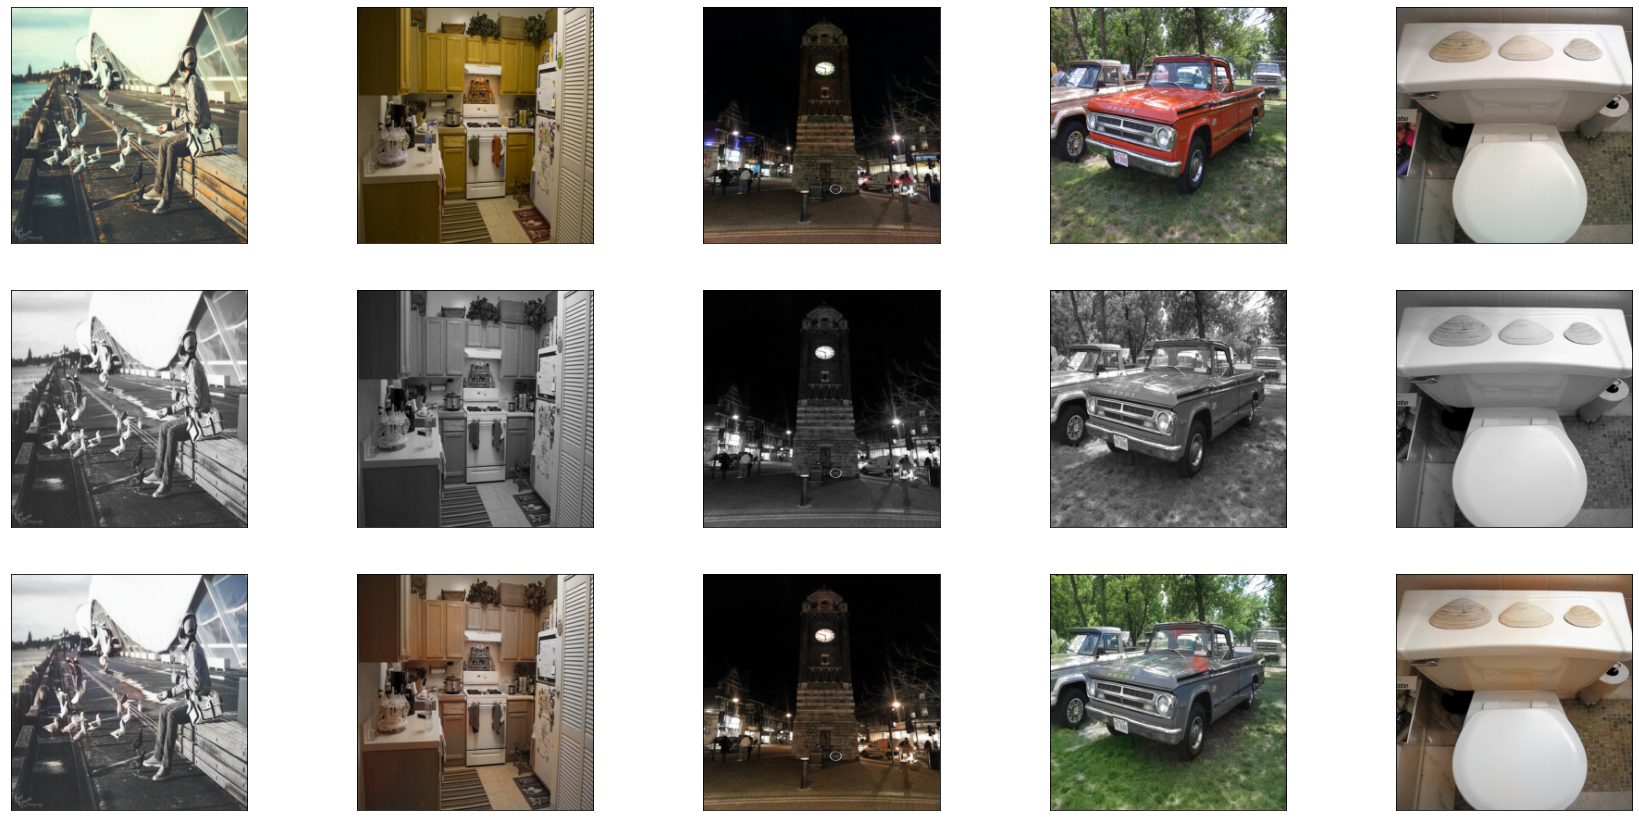

In [19]:
multi_plot(testloader, generator)

In [140]:
import sys
log = open("myprog.log", "a")
sys.stdout = log

In [141]:
print("Ok")